# Assignment:-

# Applying SGD on Boston House Prices

1. About the dataset
Title: Boston House Prices dataset. Link: http://archive.ics.uci.edu/ml/datasets/Housing

Relevant Information: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonicprices and the demand for clean air', J. Environ. Economics & Management,vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics..', Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter. The Boston house-price data has been used in many machine learning papers that address regression problems.

Data includes: Number of Instances: 506
Number of Attributes: 13 numeric/categorical predictive
*Median Value (attribute 14) is usually the target

Attribute Information:
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per tenthousand dollar
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000's


## 1. Objective:-
In Boston House Price dataset where we need to predict house price for a given set of attributes. So, this is a regression problem and we will use linear-regression to predict the house prices.
Apart from that we will implement linear regression using both gradient descent optimizer and stochastic gradient descent(SGD) optimizer and will compare their performance.

In [1]:
# loading required libraries 
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import string
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## 2. Loading boston data set from sklearn.


In [2]:
# loading boston dataset from sklearn
from sklearn.datasets import load_boston
boston=load_boston()

#Knowing datapoints and feature names
print('This dataset contains data about {} homes and each containing {} features about them'. format(*boston.data.shape))

#The boston variable itself is a dictionary, so we can check for its keys using the snippet below.
print(boston.keys())

#Knowing column names in our dataset
print(boston.feature_names)


This dataset contains data about 506 homes and each containing 13 features about them
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [3]:
print(boston.target)


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [4]:
#Create a DataFrame bos containing all the data to use in predicting Boston Housing prices.¶
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [6]:
print(boston.target.shape)


(506,)


In [7]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [8]:
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [9]:
print(bos.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [10]:
X = bos.drop('PRICE', axis = 1)
Y = bos.PRICE

## 2.1 Standardizing Data

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
standardized_X = X_scaler.transform(X)
print(standardized_X.shape)

(506, 13)


## 3.Applying Stochatic Gradient Descent From Scratch

## 3.1 Calculating cost function

In [12]:
# The below function will compute the cost for each point:
def  cal_cost(theta,X,y,m):
    #m = len(y)
    
    predictions = X.dot(theta)
    
    cost = (1/2*506) * np.sum(np.square(predictions-y))
    
    return cost

## 3.2 Determining Optimal Weights and cost

In [13]:
#The below method will compute the optimal weights and cost :
def stochastic_gradient_descent(X,y,theta,learning_rate=0.2,iterations=10):
  
    m = len(y) #length of the data set
    cost_value = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)
            
            theta = theta -(2/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i,m)
            
            
        cost_value[it]  = cost
        
    return theta, cost_value

In [14]:
#learning_rate
lr =0.2

#no. of iterations
n_iter = 100 

theta = np.random.randn(14,1)

#adding the bias weight's features
X_b = np.c_[np.ones((len(standardized_X),1)),standardized_X] 

 # calling the sgd_function
theta_updated,cost_history = stochastic_gradient_descent(X_b,Y,theta,lr,n_iter)

print(cost_history)

[42984674.45981438 19065733.90753102 10100948.15109663  8472760.97784814
  5167627.84629632  3430928.84321833  3013691.84990894  3540639.58368588
  3088216.4269686   2745874.80156676  2540935.32050461  2396364.74808609
  3323220.08855247  3337823.65750375  3151228.09614569  2591115.6388071
  3282577.94878804  2381458.35051078  2667218.4559602   2635620.91858626
  3041193.08491147  2979550.96528399  2596305.11386917  2710421.34551427
  2450213.98256632  1860192.32301035  2885561.58217175  2579718.76019554
  2567065.01151585  2929302.56167601  2923785.25396308  2826613.60790927
  2819304.8996654   2566193.08040736  2513590.64232507  2981537.02644306
  2792195.58638274  2392780.84937154  3103699.88455786  2359831.42289333
  2740740.48878731  2725267.73357724  2615822.77890918  2600783.65765379
  2474455.15942701  3022727.71142724  2743010.22879668  2963275.24282101
  2472223.94112213  3086494.0306036   2938482.52444306  2379091.79684328
  2890373.52524421  2640192.34712254  2603094.616219

## 3.3 Calculating weights

In [15]:
print('Intercept Term(bias term) :  {:0.3f}\n'.format(theta_updated[0][0]))

print('*'*100)
print('Predicted Weights(without bias term :)')
weight_vector = theta_updated[1:]
print(weight_vector)

Intercept Term(bias term) :  22.357

****************************************************************************************************
Predicted Weights(without bias term :)
[[-1.02675933]
 [ 1.08694025]
 [ 0.15820468]
 [ 0.63007197]
 [-1.92812299]
 [ 2.79943447]
 [-0.05714188]
 [-2.89220411]
 [ 2.26386162]
 [-1.95011786]
 [-2.02916807]
 [ 0.81521694]
 [-3.59298243]]


## 3.4 Calculating Different metrics

In [16]:
y_predicted = X_b.dot(theta_updated)
y_predicted = y_predicted.ravel()

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y, y_predicted))
print('MSE:', metrics.mean_squared_error(Y, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, y_predicted)))

MAE: 3.2196879117976898
MSE: 22.07329507367132
RMSE: 4.698222544076783


In [17]:
from scipy import stats
x = Y
y = y_predicted
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

idx = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']
data = np.array([slope, intercept, r_value, p_value, std_err])

print(pd.DataFrame(data= data, index= idx , columns =['values']))

regline = lambda S: 0.7466*x +6.0860359
S=np.array([x.min(),x.max()])

                  values
slope       7.505434e-01
intercept   5.445072e+00
r_value     8.596936e-01
p_value    3.789703e-149
std_err     1.986444e-02


## 3.5 Plotting graph  between Actual Prices vs Predicted prices

Text(0.5,1,'Actual Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

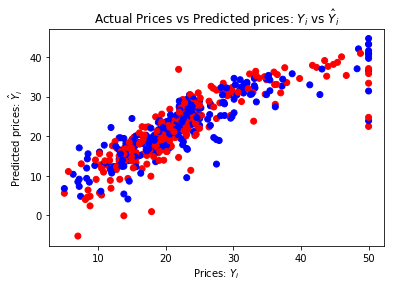

In [18]:
plt.scatter(Y, y_predicted,color=['red','blue'])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


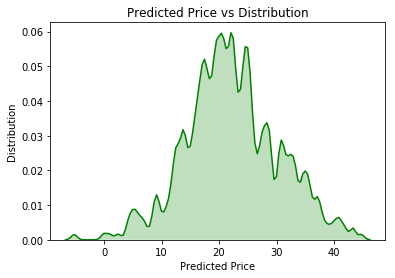

In [19]:
sns.kdeplot(y_predicted, bw = 0.5, color = "g", shade = True)
plt.xlabel("Predicted Price")
plt.ylabel("Distribution")
plt.title("Predicted Price vs Distribution")
plt.show()

## 4.Applying SGD Regressor from sklearn

In [20]:
#Computing the intercept and weight coffecients using the sklearn library:
from sklearn import linear_model

clf =linear_model.SGDRegressor(n_iter = 100 , penalty=None ,eta0=0.2, loss='squared_loss' )
clf.fit(standardized_X , Y)
print("\n Accuracy of model using L1 Regularization",clf.score(standardized_X, Y))
#Predicting the target values for standardised data :
y_pred = clf.predict(standardized_X)
print('\n Number of coefficients',len(clf.coef_))
print("\n Intercept of the Best fit line : {} ".format(clf.intercept_))


 Accuracy of model using L1 Regularization 0.7271994230572881

 Number of coefficients 13

 Intercept of the Best fit line : [22.13122229] 


## 4.1 Calculating intercepts and weights

In [21]:
# Intercept and weight vector Coffecient Calculation :
print('\n Intercept term :' , clf.intercept_ )
print('\n Weight vector :' , clf.coef_.reshape(-1 , 1))


 Intercept term : [22.13122229]

 Weight vector : [[-0.8294618 ]
 [ 0.96874363]
 [ 0.53636924]
 [ 1.18495862]
 [-2.28718941]
 [ 2.13450772]
 [ 0.09676401]
 [-2.91377429]
 [ 2.74079082]
 [-1.82246344]
 [-1.98559165]
 [ 0.70719972]
 [-3.91391879]]


## 4.2 Plotting a graph between Actual Prices vs Predicted prices

Text(0.5,1,'Actual Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

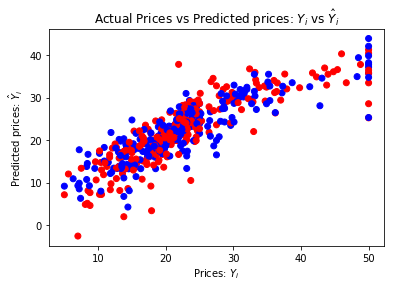

In [22]:
plt.scatter(Y, y_pred,color=['red','blue'])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


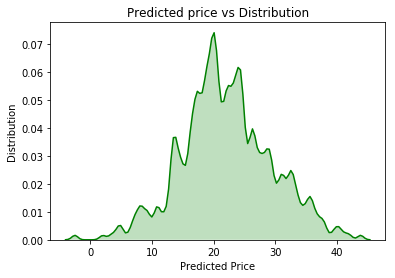

In [23]:
sns.kdeplot(y_pred, bw = 0.5, color = "g", shade = True)
plt.xlabel("Predicted Price")
plt.ylabel("Distribution")
plt.title("Predicted price vs Distribution")
plt.show()

## 4.3 Calculating different metrics

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y, y_pred))
print('MSE:', metrics.mean_squared_error(Y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, y_pred)))

MAE: 3.348244499466222
MSE: 23.029703624649628
RMSE: 4.798927341047125


In [25]:
from scipy import stats
x = Y
y = y_pred
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

idx = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']
data = np.array([slope, intercept, r_value, p_value, std_err])

print(pd.DataFrame(data= data, index= idx , columns =['values']))

regline = lambda S: 0.7466*x +6.0860359
S=np.array([x.min(),x.max()])

                  values
slope       6.808384e-01
intercept   6.790022e+00
r_value     8.560335e-01
p_value    1.524802e-146
std_err     1.831309e-02


## Comparing results of SGD from scratch and SGD Regressor

#SGD From Scratch

1) The Mean absolute error of SGD from scratch is 3.330089

2) The Root Mean Squared error of SGD from scratch is 4.713072

SGD Regressor from sklearn 

1) The Mean absolute error of SGD Regressor from sklearn is 3.357264

2) The Root Mean Squared error of SGD Regressor from sklearn is 4.781386

----------------------------------------------------
|Type of Algorithm|   MSE     |   MAE    |  RMSE   |
|-----------------|-----------| ---------|---------|
|                 |           |          |         |
|SGD from scratch |22.073295  |3.219687  |4.698222 |
|                 |           |          |         |
|                 |           |          |         |
-------------------------------------------------------

-----------------------------------------------------------
|Type of Algorithm         |   MSE    |   MAE   |  RMSE   |
|--------------------------| ---------|---------|---------|
|                          |          |         |         |
|SGD Regressor from SKlearn|23.02970  |3.348244 |4.798927 |
|                          |          |         |         |
|                          |          |         |         |
--------------------------------------------------------------


## Conclusion 

Stochastic gradient descent also known as incremental gradient descent, is an iterative method for optimizing a differentiable objective function, a stochastic approximation of gradient descent optimization.

The gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net).

Learning rate. Learning rate is a decreasing function of time. Two forms that are commonly used are a linear function of time and a function that is inversely proportional to the time t

Steps Involved:-

1) Loading Boston dataset from sklearn

2) Standardizing Data

3) Applying Stochatic Gradient Descent From Scratch

4) calculated weights and intercepts values

5) Calculating Different metrics like mean squared error,mean absolute error, Root mean square error

6) Plotting graph between Actual Prices vs Predicted prices

7) Applying SGD Regressor from sklearn

8) Calculating intercepts and weights

9) Plotting a graph between Actual Prices vs Predicted prices

10) Calculating different metrics

11) Comparing results of SGD from scratch and SGD Regressor from sklearn